In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from numpy import pi
from numpy import sqrt

In [3]:
R=(295/2)*10**-3
dR = 0.5e-3
N_h=124
N=4e3
A=41.7e-4
mu=1.2566e-6

B = (3.44±0.03)mT
B_erw = (3.02±0.01)mT


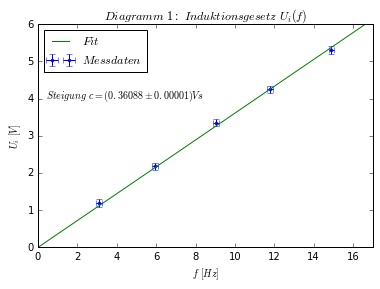

In [4]:
#1) Induktionsgesetz - U_i(f)
f, U_i = np.loadtxt('Messung Ui(f).txt', skiprows=1, unpack=True)
df = 0.15
dU_i = 0.1
I = 4
dI = 0.002

plt.errorbar(f, U_i,xerr=df, yerr=dU_i, fmt='.', label=r'$Messdaten$')
plt.axis([0,17,0,6])
plt.xlabel(r'$f$ $[Hz]$')
plt.ylabel('$U_i$ $[V] $')
plt.title(r'$Diagramm$ $1:$ $Induktionsgesetz$ $U_i(f)$')

def linear(x, c):
    return c*x

x = np.linspace(0,17, 1000)
popt, pcov = curve_fit(linear, f, U_i)

B=popt[0]/(2*pi*A*N)
dB=sqrt(pcov[0,0])/(2*pi*A*N)
B_erw=mu*8*I*N_h/(sqrt(125)*R)
dB_erw=B_erw*np.sqrt((dI/I)**2+(dR/R)**2)

plt.plot(x, linear(x, *popt), label=r'$Fit$')
plt.legend(loc='upper left')
plt.annotate(r'$Steigung$ $c = ({:.5f}\pm{:.5f})Vs$'.format(popt[0], pcov[0,0]), (0.4, 4.0) )
plt.savefig('Diagramm1.pdf', orientation ='landscape')

print('B = ({}±{})mT'.format(round(B*1000, 2),round(dB*1000,2)))
print('B_erw = ({}±{})mT'.format(round(B_erw*1000, 2),round(dB_erw*1000,2)))


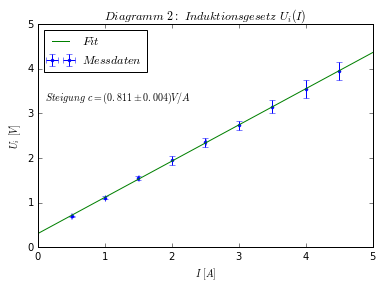

In [5]:
#1) Induktionsgesetz - U_i(I)
I, U_i = np.loadtxt('Messung Ui(I).txt', skiprows=1, unpack=True)
dI = 0.001
dU_i = np.array([0.01,0.03,0.05,0.1,0.1,0.1,0.15,0.2,0.2])

plt.errorbar(I, U_i,xerr=dI, yerr=dU_i, fmt='.', label=r'$Messdaten$')
plt.axis([0,5,0,5])
plt.xlabel(r'$I$ $[A]$')
plt.ylabel('$U_i$ $[V] $')
plt.title(r'$Diagramm$ $2:$ $Induktionsgesetz$ $U_i(I)$')

def linear2(x, c, a):
    return c*x+a

x = np.linspace(0,5, 1000)
popt, pcov = curve_fit(linear2, I, U_i)
plt.plot(x, linear2(x, *popt), label=r'$Fit$')
plt.legend(loc='upper left')
plt.annotate('$Steigung$ $c=({} \pm {})V/A$'.format(round(popt[0], 3),round(sqrt(pcov[0,0]), 3)), (0.1, 3.3) )
plt.savefig('Diagramm2.pdf', orientation ='landscape')


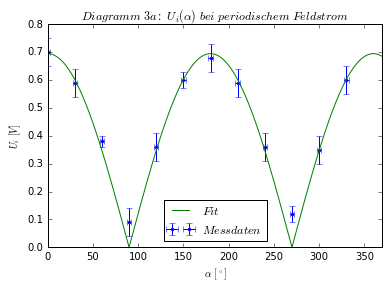

In [6]:
#2) Induktionsspannung bei periodischem Feldstrom - U_i(alpha)
alpha, U_i, dU_i = np.loadtxt('Messung Ui(alpha).txt', skiprows=1, unpack=True)
dalpha = 2.5
U=U_i
dU=dU_i


plt.errorbar(alpha, U, xerr=dalpha, yerr=dU, fmt='.', label=r'$Messdaten$')
plt.axis([0,370,0,0.8])
plt.xlabel(r'$\alpha$ $[^\circ]$')
plt.ylabel('$U_i$ $[V] $')
plt.title(r'$Diagramm \ 3a: \ U_i(\alpha) \ bei \ periodischem \ Feldstrom$')

def cos(x, a):
    return a*sqrt(np.cos(x*2*pi/360)**2)

x = np.linspace(0,370, 1000)
popt, pcov = curve_fit(cos, alpha, U)
plt.plot(x, cos(x, *popt), label=r'$Fit$')
plt.legend(loc='best')
plt.savefig('Diagramm3a.pdf', orientation ='landscape')

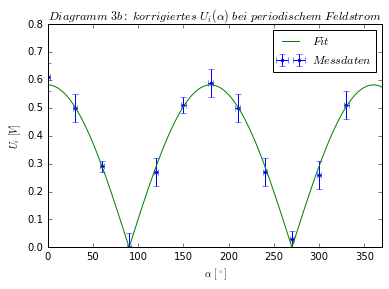

In [7]:
#2) Induktionsspannung bei periodischem Feldstrom - U_i(alpha)
alpha, U_i, dU_i = np.loadtxt('Messung Ui(alpha).txt', skiprows=1, unpack=True)
dalpha = 2.5
U=U_i-0.09
dU=dU_i


plt.errorbar(alpha, U, xerr=dalpha, yerr=dU, fmt='.', label=r'$Messdaten$')
plt.axis([0,370,0,0.8])
plt.xlabel(r'$\alpha$ $[^\circ]$')
plt.ylabel('$U_i$ $[V] $')
plt.title(r'$Diagramm \ 3b: \ korrigiertes \ U_i(\alpha) \ bei \ periodischem \ Feldstrom$')

def cos(x, a):
    return a*sqrt(np.cos(x*2*pi/360)**2)

x = np.linspace(0,370, 1000)
popt, pcov = curve_fit(cos, alpha, U)
plt.plot(x, cos(x, *popt), label=r'$Fit$')
plt.legend(loc='best')
plt.savefig('Diagramm3b.pdf', orientation ='landscape')

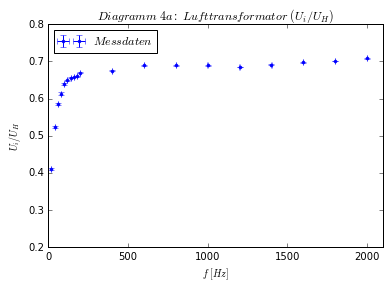

In [8]:
#2) Induktionsspannung bei periodischem Feldstrom - U_i/U_h
fi, U_i, U_h, I_h, dfi, dI_h = np.loadtxt('Messung Ui(fi).txt', skiprows=1, unpack=True)
dU = 0.01
g=U_i/U_h
dg = g*sqrt((dU/U_h)**2+(dU/U_i)**2)

plt.errorbar(fi, g,xerr=dfi, yerr=dg, fmt='.', label=r'$Messdaten$')
plt.axis([0,2100,0.2,0.8])
plt.xlabel(r'$f \ [Hz]$')
plt.ylabel('$U_i/U_H $')
plt.title(r'$Diagramm \ 4a: \ Lufttransformator \ (U_i/U_H)$')
plt.legend(loc = 'upper left')
plt.savefig('Diagramm4a.pdf', orientation ='landscape')

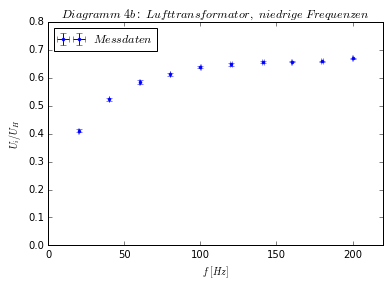

In [9]:
#2) Induktionsspannung bei periodischem Feldstrom - U_i/U_h
fi, U_i, U_h, I_h, dfi, dI_h = np.loadtxt('Messung Ui(fi).txt', skiprows=1, unpack=True)
dU = 0.02
g=U_i/U_h
dg = g*sqrt((dU/U_h)**2+(dU/U_i)**2)

y=10

plt.errorbar(fi[0: y], g[0:y],xerr=dfi[0:y], yerr=dg[0:y], fmt='.', label=r'$Messdaten$')
plt.axis([0,220,0,0.8])
plt.xlabel(r'$f \ [Hz]$')
plt.ylabel('$U_i/U_H $')
plt.title(r'$Diagramm \ 4b: \ Lufttransformator, \ niedrige \ Frequenzen$')
plt.legend(loc = 'upper left')
plt.savefig('Diagramm4b.pdf', orientation = 'landscape')

L = (28.05 ± 0.49)mH


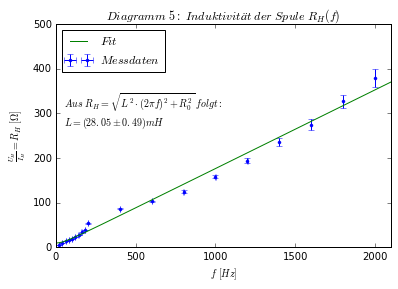

In [14]:
#2) Induktionsspannung bei periodischem Feldstrom - R_h(f)
fi, U_i, U_h, I_h, dfi, dI_h = np.loadtxt('Messung Ui(fi).txt', skiprows=1, unpack=True)
U=U_h/2
dU = 0.02/2
h=U/I_h*1000
dh = h*sqrt((dU/U)**2+(dI_h/I_h)**2)

plt.errorbar(fi, h,xerr=dfi, yerr=dh, fmt='.', label=r'$Messdaten$')
plt.axis([0,2100,0, 420])
plt.xlabel(r'$f$ $[Hz]$')
plt.ylabel(r'$\frac{U_H}{I_H}=R_H  \ [\Omega] $')
plt.title(r'$Diagramm \ 5: \ Induktivität \ der \ Spule \ R_H(f)$')

def linear3(x, L, R_0):
    #return L*2*pi*x + R_0
    return sqrt(L**2*(x*2*pi)**2 +R_0**2)

x = np.linspace(0,2100, 10000)
popt, pcov = curve_fit(linear3, fi, h)
plt.plot(x, linear3(x, *popt), label=r'$Fit$')
plt.legend(loc='upper left')
plt.ylim(0,500)

L=popt[0]*10**3
dL=sqrt(pcov[0,0])*10**3

plt.annotate(r'$Aus \ R_H = \sqrt{L^2 \cdot (2 \pi f)^2 + R_0^2} \ folgt:$'+'\n'r'$L = ({} \pm {})mH$'.format(round(L, 2),round(dL,2)), (50, 272) )
plt.savefig('Diagramm5.pdf', orientation = 'landscape')

print('L = ({} ± {})mH'.format(round(L, 2),round(dL, 2)))

In [11]:
#Bestimmung des Erdmagnetfeldes - B
f = 15.2
df = 0.5
U = 0.077
dU = 0.003

B = U/(A*N*2*pi*f)
dB = B*sqrt((dU/U)**2+(df/f)**2)

print('Der Betrag des Erdmagnetfeldes beträgt: \nB=({}±{})µT'.format(round(B*10**6, 1), round(dB*10**6, 1)))

Der Betrag des Erdmagnetfeldes beträgt: 
B=(48.3±2.5)µT


In [12]:
#Bestimmung des Erdmagnetfeldes - B_v & B_h
f = 15.2
df = 0.5
U = 0.028
dU = 0.001
I = 0.052
dI = 0.001

B_v=mu*8*I*N_h/(sqrt(125)*R)
dB_v=B_v*np.sqrt((dI/I)**2+(dR/R)**2)

B_h = U/(A*N*2*pi*f)
dB_h = B_h*sqrt((dU/U)**2+(df/f)**2)

print('Der Betrag des Vertikalkomponente beträgt: \nB_v=({}±{})µT'.format(round(B_v*10**6, 3), round(dB_v*10**6, 3)))
print('Der Betrag des Horizontalkomponente beträgt: \nB_h=({}±{})µT'.format(round(B_h*10**6, 2), round(dB_h*10**6, 2)))

Der Betrag des Vertikalkomponente beträgt: 
B_v=(39.307±0.768)µT
Der Betrag des Horizontalkomponente beträgt: 
B_h=(17.58±0.85)µT


In [13]:
#Bestimmung des Inklinationswinkels auf zwei Wegen
alpha = np.arcsin(B_v/B)*360/(2*pi)
dalpha = sqrt((180*dB_v/(pi*B*sqrt(1-B_v**2/B**2)))**2+(180*B_v*dB/(pi*B**2*sqrt(1-B_v**2/B**2)))**2)

print('alpha1 = ({} ± {})°'.format(round(alpha, 1), round(dalpha, 1)))

alpha2 = np.arctan(B_v/B_h)*360/(2*pi)
dalpha2 = sqrt(((180*B_v*dB_h)/(B_h**2*pi + pi*B_v**2))**2+((180*B_h*dB_v)/(B_h**2*pi + pi*B_v**2))**2)

print('alpha2 = ({} ± {})°'.format(round(alpha2, 1), round(dalpha2, 1)))

alpha1 = (54.4 ± 4.4)°
alpha2 = (65.9 ± 1.1)°
